In [ ]:
print("Nama:Diah Ayu Puspasari")
print("NIM:0110223052")
print("Rombel:DE02")

Nama:Diah Ayu Puspasari
NIM:0110223052
Rombel:DE02


In [ ]:
# Mengimport File CSV nya terlebih dahulu
import pandas as pd
import matplotlib.pyplot as plt

mydata =  pd.read_csv('/content/500_Person_Gender_Height_Weight_Index.csv')

In [ ]:
# Membaca dan menampilkan seluruh isi File CSV
print('Data Body Mass Index dari File CSV:')
print(mydata)

Data Body Mass Index dari File CSV:
     Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]


In [ ]:
# Menghitung jumlah data, rata-rata, nilai maksimum, nilai minimum, dari berat dan tinggi badan berdasarkan Gender menggunakan fungsi statistik
statistik = mydata.groupby('Gender').agg({'Height': ['mean', 'max', 'min'], 'Weight': ['mean', 'max', 'min']})

print("\nHasil Statistik BMI berdasarkan Gender:")
print(statistik)



Hasil Statistik BMI berdasarkan Gender:
            Height                Weight         
              mean  max  min        mean  max min
Gender                                           
Female  170.227451  199  140  105.698039  160  50
Male    169.648980  199  140  106.314286  160  50


In [ ]:
# Mengubah kolom gender menjadi data binary : female - 0, male - 1
mydata['Gender'] = mydata['Gender'].map({'Female': 0, 'Male': 1})

   Gender  Height  Weight  Index
0       1     174      96      4
1       1     189      87      2
2       0     185     110      4
3       0     195     104      3
4       1     149      61      3


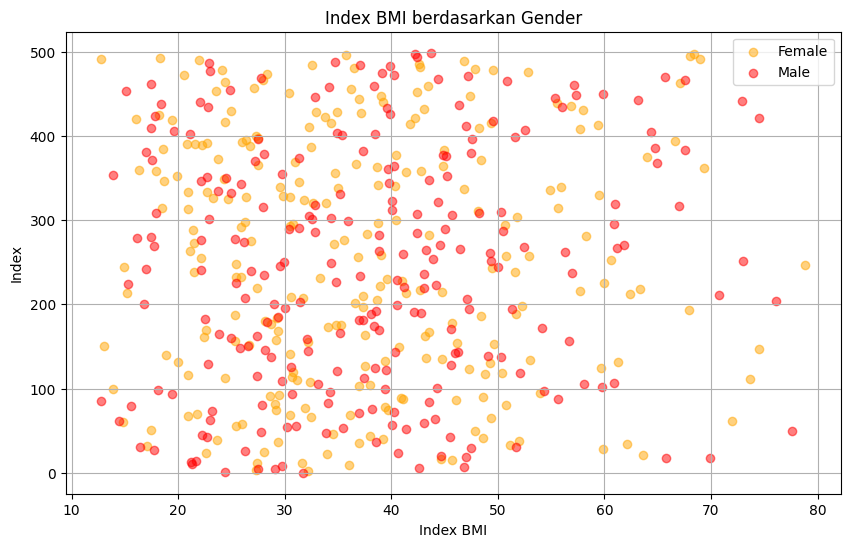

In [10]:
# Fungsi untuk menghitung Index BMI
def calculate_bmi(height, weight):

    # BMI formula: weight (kg) / (height (m))^2
    height_meters = height / 100  # Konvert tinggi dari cm ke meter
    bmi = weight / (height_meters ** 2)
    return bmi

# Hitung BMI untuk setiap baris data
mydata['BMI'] = mydata.apply(lambda row: calculate_bmi(row['Height'], row['Weight']), axis=1)

# Pisahkan data berdasarkan gender
female_data = mydata[mydata['Gender'] == 0]
male_data = mydata[mydata['Gender'] == 1]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(female_data['BMI'], female_data.index, color='orange', label='Female', alpha=0.5)
plt.scatter(male_data['BMI'], male_data.index, color='red', label='Male', alpha=0.5)
plt.xlabel('Index BMI')
plt.ylabel('Index')
plt.title('Index BMI berdasarkan Gender')
plt.legend()
plt.grid(True)
plt.show()